# Building a Model for Probability of Default
## Version 2.0
---

## Import Data and Libraries

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the Datasets

data = pd.read_csv('bank_loan_data.csv')


---
## Data Exploration

### Data Dimension - Total Rows and Columns

In [3]:
# Rows and Columns
data.shape

(74094, 19)

### Data Information - String, Numerical, Date and Categorical Variables

In [4]:
# Provides details of each Columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74094 entries, 0 to 74093
Data columns (total 19 columns):
Loan ID                         74094 non-null object
Customer ID                     74094 non-null object
Loan Status                     74094 non-null object
Current Loan Amount             74094 non-null int64
Term                            74094 non-null object
Credit Score                    62759 non-null float64
Annual Income                   57024 non-null float64
Years in current job            70878 non-null object
Home Ownership                  74094 non-null object
Purpose                         74094 non-null object
Monthly Debt                    74094 non-null float64
Years of Credit History         74094 non-null float64
Months since last delinquent    34089 non-null float64
Number of Open Accounts         74094 non-null int64
Number of Credit Problems       74094 non-null int64
Current Credit Balance          74094 non-null int64
Maximum Open Credit       

### View the Top and Bottom Rows

In [5]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,258082,Short Term,746.0,950475.0,4 years,Rent,Debt Consolidation,6748.42,11.5,NaN,12,0,330429,815782.0,0.0,0.0
1,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,541486,Long Term,479.0,NaN,6 years,Rent,Business Loan,10303.51,17.6,73.0,7,0,268337,372988.0,0.0,0.0
2,00045ecd-59e9-4752-ba0d-679ff71692b3,b7bce684-b4b0-4b29-af66-eae316bce573,Fully Paid,260986,Short Term,734.0,1314838.0,10+ years,Own Home,Debt Consolidation,16325.94,30.3,NaN,7,0,189221,373890.0,0.0,0.0
3,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,301818,Short Term,NaN,NaN,1 year,Own Home,Home Improvements,14770.22,13.6,2.0,12,0,127680,1173370.0,0.0,0.0
4,00053198-2da4-438f-9c77-5dac5a31703a,6ec7f3a2-d3f4-421b-8a52-ccbaa7895f90,Fully Paid,106788,Short Term,NaN,NaN,2 years,Rent,other,4392.61,9.6,NaN,4,0,51015,125136.0,0.0,0.0


In [6]:
data.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
74089,fff616e3-3b35-4529-a970-38f1bb02d6e1,cc11dbaa-0661-4f3b-81f6-79260b4ca0b0,Fully Paid,606716,Long Term,712.0,2037693.0,4 years,Rent,Debt Consolidation,18339.18,14.0,11.0,11,0,265240,588368.0,0.0,0.0
74090,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,d059bcea-3016-48d3-b7e0-c6e618e1f2c3,Fully Paid,146410,Short Term,724.0,1400566.0,10+ years,Rent,Debt Consolidation,11787.98,11.1,62.0,15,0,135166,403392.0,0.0,0.0
74091,fffbc431-6a56-467c-a5f7-772928f96715,ae7c08b7-6b2e-4763-b148-035bf01c3072,Fully Paid,667194,Long Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,15598.24,13.9,NaN,8,0,176396,322168.0,0.0,0.0
74092,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,111716,Short Term,369.0,1466534.0,10+ years,Own Home,Debt Consolidation,26152.93,19.1,47.0,9,0,32623,214676.0,0.0,0.0
74093,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,613844,Long Term,678.0,2232120.0,10+ years,Home Mortgage,Debt Consolidation,47990.58,18.0,11.0,10,0,538023,1372162.0,0.0,0.0


### Data Description

In [7]:
data.describe(include="all")

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,74094,74094,74094,74094.000000,74094,62759.000000,5.702400e+04,70878,74094,74094,74094.000000,74094.000000,34089.000000,74094.000000,74094.000000,7.409400e+04,7.409200e+04,73938.000000,74087.000000
unique,74094,74094,2,NaN,2,NaN,NaN,11,4,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,c2dfc74b-473d-42fd-ba17-10208e7d7783,40061953-706e-4329-919c-faa927a9adbe,Fully Paid,NaN,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,51455,NaN,54379,NaN,NaN,22831,35801,58580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,308587.854644,NaN,600.858682,1.369007e+06,NaN,NaN,NaN,18392.751771,18.229637,34.971340,11.118377,0.163616,2.932715e+05,7.932083e+05,0.114217,0.028790
std,NaN,NaN,NaN,183154.097773,NaN,159.113564,1.143189e+06,NaN,NaN,NaN,12147.684229,7.023838,22.018392,4.991611,0.477865,3.715159e+05,9.667757e+06,0.346176,0.258422
min,NaN,NaN,NaN,10802.000000,NaN,300.000000,7.662700e+04,NaN,NaN,NaN,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,NaN,NaN,171974.000000,NaN,436.000000,8.443125e+05,NaN,NaN,NaN,10160.630000,13.500000,16.000000,8.000000,0.000000,1.133968e+05,2.772660e+05,0.000000,0.000000
50%,NaN,NaN,NaN,265672.000000,NaN,702.000000,1.164994e+06,NaN,NaN,NaN,16148.290000,17.000000,32.000000,10.000000,0.000000,2.101020e+05,4.721640e+05,0.000000,0.000000
75%,NaN,NaN,NaN,429792.000000,NaN,734.000000,1.639439e+06,NaN,NaN,NaN,23885.802500,21.700000,51.000000,14.000000,0.000000,3.669470e+05,7.903170e+05,0.000000,0.000000


---
## Data Cleaning

### Drop Null Rows

### Find Null Cells

In [8]:
data.isnull().head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    11335
Annual Income                   17070
Years in current job             3216
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    40005
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      156
Tax Liens                           7
dtype: int64

#### Replace Null Values

##### Replace Categorical Variables with mode value

In [10]:
# The "mode" is the value that occurs most often. Best suited for categorical variables

data["Years in current job"].fillna(data["Years in current job"].mode()[0],inplace = True)

data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    11335
Annual Income                   17070
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    40005
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      156
Tax Liens                           7
dtype: int64

##### Replace Numerical Values with the mean value

In [11]:
# The "median" is the average of all values. Best suited for numerical variables

data["Credit Score"].fillna(data["Credit Score"].median(),inplace = True)
data["Annual Income"].fillna(data["Annual Income"].median(),inplace = True)
data["Months since last delinquent"].fillna(data["Months since last delinquent"].median(),inplace = True)
data["Maximum Open Credit"].fillna(data["Maximum Open Credit"].median(),inplace = True)
data["Bankruptcies"].fillna(data["Bankruptcies"].median(),inplace = True)
data["Tax Liens"].fillna(data["Tax Liens"].median(),inplace = True)

data.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

### Remove Duplicate Rows

In [12]:
duplicateRowsDF = data[data.duplicated()]

data.drop_duplicates(keep='last',inplace=True)

### Add a Numerical Column Based on Categorical Variable

In [13]:
defaulter =[]


for index, row in data.iterrows():
    if row['Loan Status'] == "Fully Paid":
        defaulter.append(0)
    else:
        defaulter.append(1)

data.insert(3,"Defaulter",defaulter)
        

---
## Plot the Data

### Box Plot 
#### Shows the five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”)

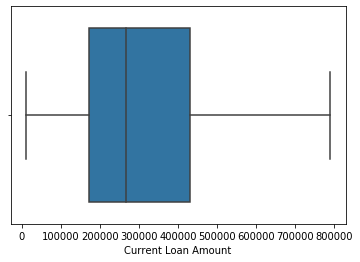

In [14]:
sns.boxplot(x=data["Current Loan Amount"])

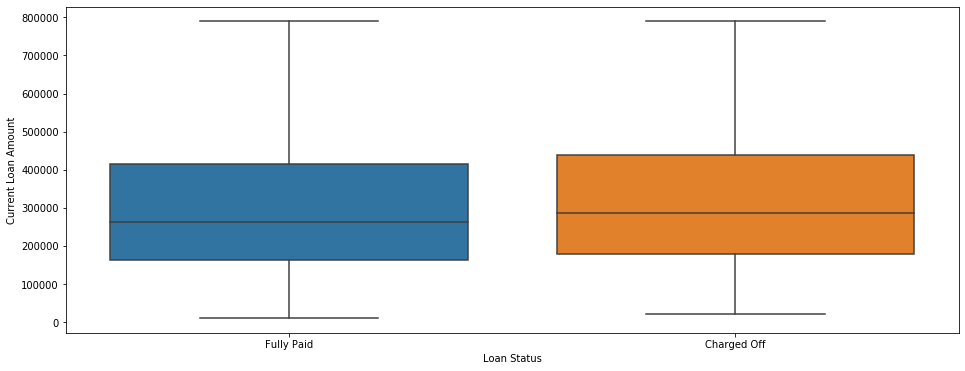

In [15]:
plt.figure(figsize=(16,6))
sns.boxplot(x=data["Loan Status"],y=data["Current Loan Amount"])

### Heatmap 
#### Shows Correlation between Variables

In [16]:
data.corr()

,Defaulter,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Defaulter,1.000000,0.059349,-0.940414,-0.051972,0.014078,-0.031910,-0.012884,0.016054,0.009435,-0.009558,-0.011162,-0.001467,0.013864
Current Loan Amount,0.059349,1.000000,-0.071611,0.299482,0.434159,0.152944,-0.025638,0.200297,-0.072468,0.328704,0.032618,-0.099083,0.021109
Credit Score,-0.940414,-0.071611,1.000000,0.052455,-0.021256,0.036766,0.013470,-0.015001,-0.011899,0.007994,0.009017,-0.001671,-0.012520
Annual Income,-0.051972,0.299482,0.052455,1.000000,0.400451,0.128060,-0.032847,0.119913,-0.009230,0.253988,0.031294,-0.037650,0.039612
Monthly Debt,0.014078,0.434159,-0.021256,0.400451,1.000000,0.192777,-0.033016,0.407923,-0.049594,0.473819,0.033798,-0.076323,0.024742
Years of Credit History,-0.031910,0.152944,0.036766,0.128060,0.192777,1.000000,-0.015321,0.129183,0.060751,0.205515,0.029211,0.064709,0.018945
Months since last delinquent,-0.012884,-0.025638,0.013470,-0.032847,-0.033016,-0.015321,1.000000,-0.014443,0.077612,-0.023458,-0.004437,0.084526,0.011735
Number of Open Accounts,0.016054,0.200297,-0.015001,0.119913,0.407923,0.129183,-0.014443,1.000000,-0.012963,0.226990,0.027754,-0.024046,0.007497
Number of Credit Problems,0.009435,-0.072468,-0.011899,-0.009230,-0.049594,0.060751,0.077612,-0.012963,1.000000,-0.108413,-0.011061,0.749531,0.586927
Current Credit Balance,-0.009558,0.328704,0.007994,0.253988,0.473819,0.205515,-0.023458,0.226990,-0.108413,1.000000,0.129104,-0.120134,-0.012795


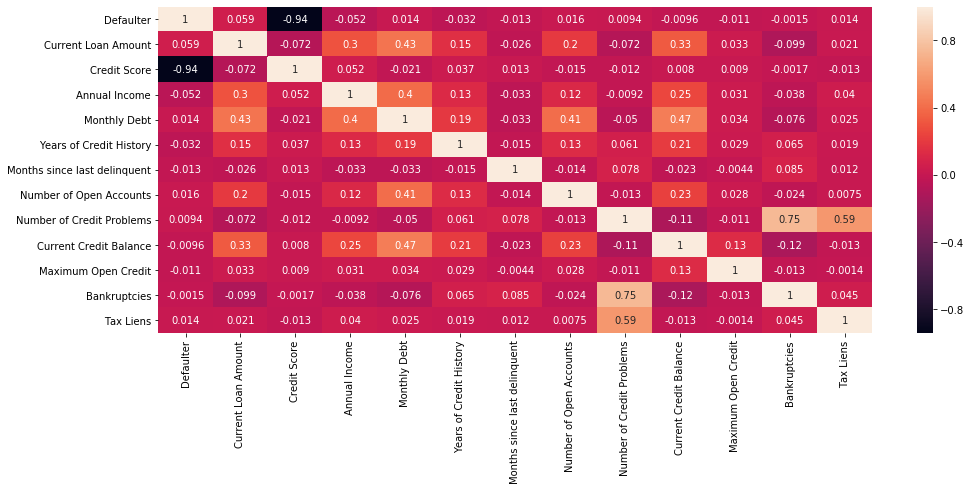

In [17]:
plt.figure(figsize=(16,6)) # Width and Height in Inches
sns.heatmap(data.corr(),xticklabels=data.corr().columns, yticklabels=data.corr().columns, annot=True)

## Scatter Plot

#### Plot the Extent of Correlation

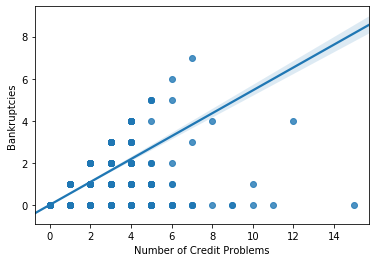

In [45]:
sns.regplot(x=data["Number of Credit Problems"],y=data["Bankruptcies"])


---

## Identify Dependent and Independent Variables

Use a Machine Learning Algorithm to Select the most suited Variables <br/>
Method - (RFE - Recrusive Feature Selection)

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data[['Current Loan Amount','Credit Score','Months since last delinquent','Annual Income','Monthly Debt',
          'Years of Credit History','Number of Open Accounts',
          'Number of Credit Problems','Current Credit Balance','Maximum Open Credit',
          'Bankruptcies','Tax Liens']]

y = data[['Defaulter']]

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3) # Selects the best 3 Variables that are independent of each other
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Num Features: 3
Selected Features: [False  True False False False False  True False False False  True False]
Feature Ranking: [ 5  1  3  7  4  2  1  8  6 10  1  9]


---
## Splitting Data

### Testing and Training Data
Variables are selected based on the above **Feature Ranking**

In [33]:
X = data[['Credit Score','Number of Open Accounts','Bankruptcies']]

y = data[['Defaulter']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=100)

In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14819 entries, 26380 to 40778
Data columns (total 3 columns):
Credit Score               14819 non-null float64
Number of Open Accounts    14819 non-null int64
Bankruptcies               14819 non-null float64
dtypes: float64(2), int64(1)
memory usage: 463.1 KB


---
## Logistic Regression Model

### Build the Model

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,np.ravel(y_train))

LogisticRegression()


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### Defaulter Ratio in Test Data Set

In [36]:
(y_test[y_test['Defaulter']==1].count()/y_test.count()*100)

Defaulter    30.602605
dtype: float64

##### Defaulter Ratio in Training Data Set

In [37]:
(y_train[y_train['Defaulter']==1].count()/y_train.count()*100)

Defaulter    30.542387
dtype: float64

### Apply the Model on the Test Data

In [38]:
y_predict=model.predict(X_test)
y_predict

array([1, 0, 0, ..., 1, 0, 0])

### Check the Model Accuracy


In [39]:
model.score(X_test,y_test)

0.9829948039678791

#### Model Intercept

### Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[10080   204]
 [   48  4487]]


#### Interpreting the Results of a Confusion Matrix

* True Negative (Top Left) - We predicted as **non-defaulters** and it was **non-defaulters**
* True Positive (Bottom Right) - We predicted as **non-defaulters** and it was **non-defaulters**
* False Positive (Top Right) - We predicted as **non-defaulters** but it was **defaulters**

* False Negative (Bottom Left) - We predicted as **non-defaulters** but it was **defaulters**

### Credit Classification Report

In [43]:
preds_df = pd.DataFrame(y_predict, columns = ['Prediction'])

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds_df['Prediction']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10284
           1       0.96      0.99      0.97      4535

    accuracy                           0.98     14819
   macro avg       0.98      0.98      0.98     14819
weighted avg       0.98      0.98      0.98     14819



### How to Interpret Classification Summary Report

* Out of all Rows in the Test Dataframe, the Model has an accuracy of 98%. This means that 98% of all predictions are correct.

* Recall of .98 for Non-Defaulters means a 98% Accuracy in detecting **non-defaulters**
* A recall value of .99 for Defaulters means just a mere 1% chance of missing a default.

---

## Changes from Previous Model V1

* Used a Machine Learning Algorithm to Select the most suited Variables (RFE - Recrusive Feature Selection) before Performing building the model
* This has been done to:
* - Reduce Overfitting: Less redundant data means less opportunity to make decisions based on noise
* - Improve Accuracy: Less misleading data means modeling accuracy improves.
* - Reduce Training Time: Less data means that algorithms train faster.

## Model Summary

* This is the Best Fit Model to predict both defaulters and non-defaulters with nearly 100% Accuracy.